In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [12]:
plt.rcParams['figure.figsize'] = [12,6]
sns.set_style('darkgrid')

In [13]:
house = pd.read_csv("Maison.csv")
home_df= house

In [14]:
home_df= home_df.rename(index = str, columns = {'PRIX':'price','SUPERFICIE': 'area','CHAMBRES': 'rooms', 
                         'SDB': 'bathroom', 'ETAGES': 'floors','ALLEE': 'driveway',
                         'SALLEJEU':'game_room', 'CAVE': 'cellar', 
                         'GAZ': 'gas', 'AIR':'air', 'GARAGES': 'garage', 'SITUATION': 'situation'})

In [15]:
home_df.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [16]:
home_df.shape

(546, 12)

In [17]:
home_df.describe()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.858974,0.177656,0.349817,0.045788,0.316850,0.692308,0.234432
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.348367,0.382573,0.477349,0.209216,0.465675,0.861307,0.424032
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


<AxesSubplot:>

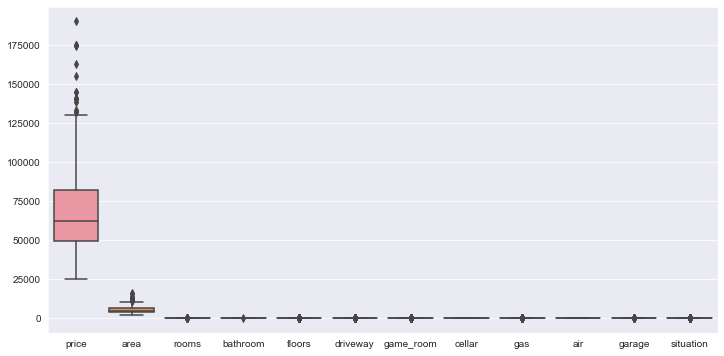

In [18]:
sns.boxplot(data=home_df)

In [19]:
Q1 = home_df.quantile(0.25)
Q3 = home_df.quantile(0.75)
IQR = Q3 - Q1
((home_df < (Q1 - 1.5 * IQR)) | (home_df > (Q3 + 1.5 * IQR))).sum()


price         15
area          12
rooms         12
bathroom       1
floors        41
driveway      77
game_room     97
cellar         0
gas           25
air            0
garage        12
situation    128
dtype: int64

In [1]:
for x in ['game_room']:
    q75,q25 = np.percentile(home_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    home_df.loc[home_df[x] < min,x] = np.nan
    home_df.loc[home_df[x] > max,x] = np.nan

NameError: name 'np' is not defined

In [21]:
home_df.isnull().sum()

price         0
area          0
rooms         0
bathroom      0
floors        0
driveway      0
game_room    97
cellar        0
gas           0
air           0
garage        0
situation     0
dtype: int64

In [22]:
home_df= home_df.dropna(axis=0)

In [23]:
home_df.shape

(449, 12)

In [24]:
home_df.corr()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
price,1.000000,0.546425,0.346906,0.549986,0.447514,0.284607,NaN,0.136649,0.100528,0.422534,0.386387,0.342016
area,0.546425,1.000000,0.109259,0.199120,0.081642,0.264758,NaN,-0.011921,-0.025748,0.223585,0.355810,0.221569
rooms,0.346906,0.109259,1.000000,0.401002,0.411169,-0.044122,NaN,0.104378,0.032631,0.125555,0.141209,0.064377
bathroom,0.549986,0.199120,0.401002,1.000000,0.340922,0.049749,NaN,0.127316,0.035274,0.222928,0.197159,0.099333
floors,0.447514,0.081642,0.411169,0.340922,1.000000,0.125299,NaN,-0.105865,0.042153,0.272223,0.074634,0.065523
driveway,0.284607,0.264758,-0.044122,0.049749,0.125299,1.000000,NaN,0.009826,-0.021111,0.096485,0.215657,0.186130
game_room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cellar,0.136649,-0.011921,0.104378,0.127316,-0.105865,0.009826,NaN,1.000000,0.009237,0.050310,0.039277,0.158741
gas,0.100528,-0.025748,0.032631,0.035274,0.042153,-0.021111,NaN,0.009237,1.000000,-0.117329,0.082671,-0.032960
air,0.422534,0.223585,0.125555,0.222928,0.272223,0.096485,NaN,0.050310,-0.117329,1.000000,0.163018,0.108421


In [25]:
home_df=home_df.drop(['game_room'], axis=1)

<AxesSubplot:>

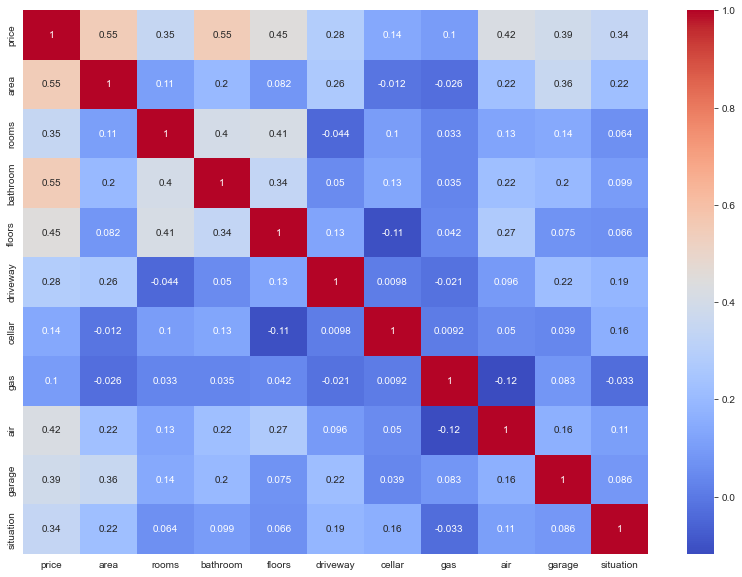

In [26]:
corr=home_df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot= True, cmap='coolwarm')

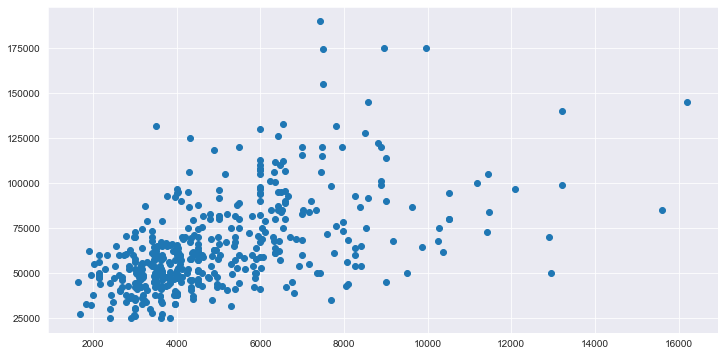

In [27]:
plt.scatter(home_df['area'], home_df['price'])
plt.show()

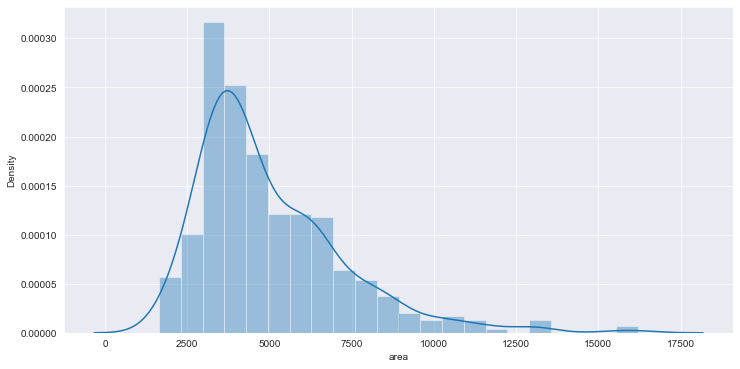

In [28]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(home_df['area'])
plt.show()

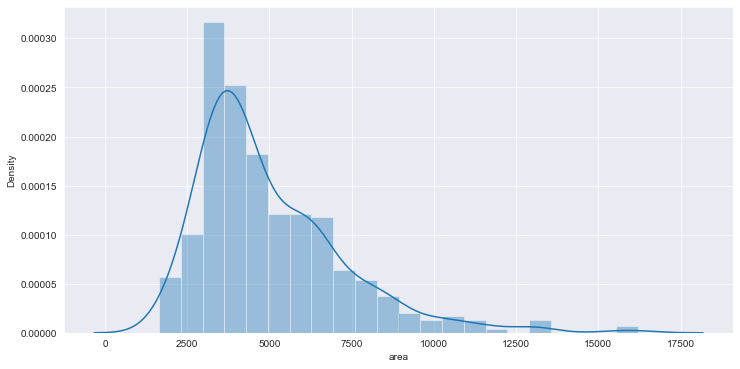

In [29]:
sns.distplot(home_df['area'])
plt.show()

In [30]:
sc=StandardScaler()
a=sc.fit_transform(home_df)
print(a)

[[-0.88115498  0.3761637   0.08353038 ... -0.63492125  0.37321832
  -0.50417253]
 [-1.01547671 -0.45128726 -1.25593887 ... -0.63492125 -0.78247151
  -0.50417253]
 [-0.5933227  -0.8717218   0.08353038 ... -0.63492125 -0.78247151
  -0.50417253]
 ...
 [ 0.76908339  0.67807148  0.08353038 ... -0.63492125  0.37321832
  -0.50417253]
 [ 1.11448212  0.44325432  0.08353038 ...  1.57499846 -0.78247151
  -0.50417253]
 [ 1.53663612  0.44325432  0.08353038 ...  1.57499846  0.37321832
  -0.50417253]]


In [31]:
mean=np.mean(a, axis=0)
print('mean:(%d,%d)'%(mean[0],mean[1]))
sd=np.std(a,axis=0)
print("sd:(%d,%d)"%(sd[0],sd[1]))

mean:(0,0)
sd:(1,1)


In [32]:
# Import the libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [33]:
# We now instatiate a Linear Regression object
#lm = LinearRegression()

In [34]:
# let's do the split of the dataset
home_df.columns
x = home_df[['area', 'rooms', 'bathroom', 'floors', 'driveway',
       'cellar', 'air','gas','garage', 'situation']]
y = home_df['price']

In [35]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=101)

In [36]:
## Let's chec the head of some of these splits
lm=LinearRegression()
lm.fit(x_train,y_train)
#x_test.head()
# We see that they are randomly selected

LinearRegression()

In [37]:
import statsmodels.api as sm

In [38]:
x_endog= sm.add_constant(x_train)
res = sm.OLS(y_train, x_endog).fit()
predicitions=res.predict(x_endog)


In [39]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     81.83
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           4.02e-85
Time:                        11:52:24   Log-Likelihood:                -3951.6
No. Observations:                 359   AIC:                             7925.
Df Residuals:                     348   BIC:                             7968.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5294.2650   4030.263     -1.314      0.190   -1.32e+04    2632.474
area           3.9153      0.387     10.110      0.000       3.154       4.677
rooms       1302.2779   1261.890      1.032      0.303   -1179.612    3784.168
bathroom    1.505e+04   1866.446      8.065      0.000    1.14e+04    1.87e+04
floors      7699.4634   1074.663      7.165      0.000    5585.811    9813.115
driveway    4733.0848   2404.005      1.969      0.050       4.877    9461.292
cellar      6912.5973   1869.112      3.698      0.000    3236.420    1.06e+04
air         9345.1463   1843.123      5.070      0.000    5720.085     1.3e+04
gas         1.392e+04   3761.904      3.699      0.000    6517.278    2.13e+04
garage      4512.3056    967.581      4.663      0.000    2609.264    6415.348
situation   1.034e+04   2025.214      5.106      0.000    6358.062    1.43e+04
==============================================================================
Omnibus:                       48.780   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.170
Skew:                           0.739   Prob(JB):                     4.81e-22
Kurtosis:                       5.093   Cond. No.                     3.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""